In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from matplotlib import pyplot

In [2]:
fnamesIPcam = ["D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/alarmClockCam_1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/alarmClockCam_2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/alarmClockCam_3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/alarmClockCam_4_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/canarycam_1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/canarycam_2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/canarycam_3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/canarycam_4_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/d3dtraffic_1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/d3dtraffic_2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/d3dtraffic_3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/ezviz_1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/ezviz_2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/ezviz_3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/ezviz_4_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/ezviz_5_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/ezviz_6_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/ezviz_7_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/netatmocam1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/netatmocam2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/netatmocam3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/v380Cam1_1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/v380Cam1_2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/v380Cam1_3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/v380Cam1_4_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/v380Cam1_5_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/v380Cam1_6_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/v380Cam1_7_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/v380Cam1_8_Flow.csv"]
fnamesConf = [
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet4_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet5_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet6_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet7_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet8_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet9_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet10_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet11_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet12_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/MSTeams1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/MSTeams2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/MSTeams11_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/MSTeams12_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/MSTeams21_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/MSTeams22_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_4_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_5_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_6_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_7_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_8_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_9_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_10_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_11_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_12_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_13_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_14_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_15_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/zoom1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/zoom2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/zoom3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/zoom4_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/zoom5_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/zoom_6_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/zoom_7_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/zoom_8_Flow.csv",
          ]
fnamesShare = [
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/amazon1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/amazon2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/amazon3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/amazon4_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/amazon5_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_4_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_5_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_6_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_7_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_8_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_9_Flow.csv",
         ]
fnamesOther = [
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/Skype/New collection/Other data/csv/other1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/Skype/New collection/Other data/csv/other2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/Skype/New collection/Other data/csv/other3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/Skype/New collection/Other data/csv/other4_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/Skype/New collection/Other data/csv/other3_Flow.csv",
         ]

In [3]:
dfList = list()
for fname in fnamesIPcam: 
    data = pd.read_csv(fname)
    print('file:', fname, ' data size: ',data.shape)
    dfList.append(data)
############## combine the data frames
ipcamDF = pd.concat(dfList)
print(ipcamDF.shape)

file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/alarmClockCam_1_Flow.csv  data size:  (125, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/alarmClockCam_2_Flow.csv  data size:  (157, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/alarmClockCam_3_Flow.csv  data size:  (95, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/alarmClockCam_4_Flow.csv  data size:  (18, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/canarycam_1_Flow.csv  data size:  (45, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/canarycam_2_Flow.csv  data size:  (45, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/canarycam_3_Flow.csv  data size:  (143, 84)
file: D:/New pcaps_IoT

In [4]:
#see unique labels
print(list(ipcamDF['Label'].unique()))


['IPCam_AlarmClock', 'IPCam_Canary', 'IPCam_D3D', 'IPCam_Ezviz', 'IPCam_Netatmo', 'IPCam_V380']


In [5]:
ipcamDF['Label'].replace('IPCam_AlarmClock','IPCam',inplace=True)
#uniqueLabels = list(ipcamDF['Label'].unique())
#print(uniqueLabels)
print(list(ipcamDF['Label'].unique()))

['IPCam', 'IPCam_Canary', 'IPCam_D3D', 'IPCam_Ezviz', 'IPCam_Netatmo', 'IPCam_V380']


In [6]:
ipcamDF['Label'].replace('IPCam_Canary','IPCam',inplace=True)
#uniqueLabels = list(ipcamDF['Label'].unique())
#print(uniqueLabels)
print(list(ipcamDF['Label'].unique()))

['IPCam', 'IPCam_D3D', 'IPCam_Ezviz', 'IPCam_Netatmo', 'IPCam_V380']


In [7]:
ipcamDF['Label'].replace('IPCam_D3D','IPCam',inplace=True)
#uniqueLabels = list(ipcamDF['Label'].unique())
#print(uniqueLabels)
print(list(ipcamDF['Label'].unique()))

['IPCam', 'IPCam_Ezviz', 'IPCam_Netatmo', 'IPCam_V380']


In [8]:
ipcamDF['Label'].replace('IPCam_Ezviz','IPCam',inplace=True)
#uniqueLabels = list(ipcamDF['Label'].unique())
#print(uniqueLabels)
print(list(ipcamDF['Label'].unique()))

['IPCam', 'IPCam_Netatmo', 'IPCam_V380']


In [9]:
ipcamDF['Label'].replace('IPCam_Netatmo','IPCam',inplace=True)
#uniqueLabels = list(ipcamDF['Label'].unique())
#print(uniqueLabels)
print(list(ipcamDF['Label'].unique()))

['IPCam', 'IPCam_V380']


In [10]:
ipcamDF['Label'].replace('IPCam_V380','IPCam',inplace=True)
uniqueLabels = list(ipcamDF['Label'].unique())
print(uniqueLabels)
#print(list(ipcamDF['Label'].unique()))

['IPCam']


In [11]:
###################################\
dfList = list()
for fname in fnamesShare: 
    data = pd.read_csv(fname)
    print('file:', fname, ' data size: ',data.shape)
    dfList.append(data)
############## combine the data frames
shareDF = pd.concat(dfList)
print(shareDF.shape)

file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/amazon1_Flow.csv  data size:  (870, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/amazon2_Flow.csv  data size:  (516, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/amazon3_Flow.csv  data size:  (921, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/amazon4_Flow.csv  data size:  (467, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/amazon5_Flow.csv  data size:  (800, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_1_Flow.csv  data size:  (1420, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_2_Flow.csv  data size:  (52, 84)
file: D:/New pcaps_IoTSpyCamer

In [12]:
print(list(shareDF['Label'].unique()))

['VShare_Amazon', 'VShare_YouTube']


In [13]:
shareDF['Label'].replace('VShare_Amazon','VShare',inplace=True)
#uniqueLabels = list(ipcamDF['Label'].unique())
#print(uniqueLabels)
print(list(shareDF['Label'].unique()))

['VShare', 'VShare_YouTube']


In [14]:
shareDF['Label'].replace('VShare_YouTube','VShare',inplace=True)
uniqueLabels = list(shareDF['Label'].unique())
print(uniqueLabels)
#print(list(shareDF['Label'].unique()))

['VShare']


In [15]:
###################################\
dfList = list()
for fname in fnamesConf: 
    data = pd.read_csv(fname)
    print('file:', fname, ' data size: ',data.shape)
    dfList.append(data)
############## combine the data frames
confDF = pd.concat(dfList)
print(confDF.shape)

file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet1_Flow.csv  data size:  (2620, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet2_Flow.csv  data size:  (3350, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet3_Flow.csv  data size:  (3207, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet4_Flow.csv  data size:  (6585, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet5_Flow.csv  data size:  (331, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet6_Flow.csv  data size:  (4937, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet7_Flow.csv  data size:  (1436, 84)


In [16]:
print(list(confDF['Label'].unique()))

['VConf_GMeet', 'VConf_Teams', 'VConf_Skype', 'VConf_Zoom']


In [17]:
confDF['Label'].replace('VConf_GMeet','VConf',inplace=True)
#uniqueLabels = list(ipcamDF['Label'].unique())
#print(uniqueLabels)
print(list(confDF['Label'].unique()))

['VConf', 'VConf_Teams', 'VConf_Skype', 'VConf_Zoom']


In [18]:
confDF['Label'].replace('VConf_Teams','VConf',inplace=True)
#uniqueLabels = list(ipcamDF['Label'].unique())
#print(uniqueLabels)
print(list(confDF['Label'].unique()))

['VConf', 'VConf_Skype', 'VConf_Zoom']


In [19]:
confDF['Label'].replace('VConf_Skype','VConf',inplace=True)
#uniqueLabels = list(ipcamDF['Label'].unique())
#print(uniqueLabels)
print(list(confDF['Label'].unique()))

['VConf', 'VConf_Zoom']


In [20]:
confDF['Label'].replace('VConf_Zoom','VConf',inplace=True)
uniqueLabels = list(confDF['Label'].unique())
print(uniqueLabels)

['VConf']


In [21]:
###################################\
dfList = list()
for fname in fnamesOther: 
    data = pd.read_csv(fname)
    print('file:', fname, ' data size: ',data.shape)
    dfList.append(data)
############## combine the data frames
otherDF = pd.concat(dfList)
print(otherDF.shape)

file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/Skype/New collection/Other data/csv/other1_Flow.csv  data size:  (12155, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/Skype/New collection/Other data/csv/other2_Flow.csv  data size:  (1795, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/Skype/New collection/Other data/csv/other3_Flow.csv  data size:  (11728, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/Skype/New collection/Other data/csv/other4_Flow.csv  data size:  (5358, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/Skype/New collection/Other data/csv/other3_Flow.csv  data size:  (11728, 84)
(42764, 84)


In [22]:
print(list(otherDF['Label'].unique()))

['Other', 'No Label']


In [23]:
otherDF['Label'].replace('No Label','Other',inplace=True)
#uniqueLabels = list(ipcamDF['Label'].unique())
#print(uniqueLabels)
print(list(otherDF['Label'].unique()))

['Other']


In [24]:
print(list(otherDF['Label'].unique()))

['Other']


In [25]:
print(list(confDF['Label'].unique()))
print(list(shareDF['Label'].unique()))
print(list(ipcamDF['Label'].unique()))
print(list(otherDF['Label'].unique()))

['VConf']
['VShare']
['IPCam']
['Other']


In [26]:
######### creating master DF
dfListAll = [ipcamDF,shareDF, confDF, otherDF]
masterDF = pd.concat(dfListAll)
print(masterDF.shape)

(109695, 84)


In [27]:
uniqueLabels = list(masterDF['Label'].unique())
print(uniqueLabels)

['IPCam', 'VShare', 'VConf', 'Other']


In [28]:
#discard all those columns that helps in uniquely identifying a flow
masterPruned = masterDF.iloc[:,np.arange(7,84)]
print('pruneddata size: ', masterPruned.shape)
ftList = list(masterPruned.columns)
print(ftList)

pruneddata size:  (109695, 77)
['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b A

In [29]:
#discard those flows that has 0 flow duration
masterSelected = masterPruned.drop(masterPruned[masterPruned['Flow Duration']==0].index)
masterSelected.shape

(76976, 77)

In [30]:
#identify those columns that has non-numeric values
typesList = masterSelected.dtypes
ftCount = len(ftList)
nonNumericFtList = list()
for fi in range(ftCount):
    if ftList[fi] != 'Label' and typesList[fi] != 'int64' and typesList[fi] != 'float64':
        print(ftList[fi], '  ', typesList[fi])
        nonNumericFtList.append(ftList[fi])
print(nonNumericFtList)

[]


In [31]:
for ft in nonNumericFtList:
    masterSelected[ft] = pd.to_numeric(masterSelected[ft], errors='coerce')

In [32]:
print(nonNumericFtList)
for ft in nonNumericFtList:
    countNaN = masterSelected[ft].isna().sum()
    print('converted to numeric ft: ', ft, '  countNaN: ', countNaN)

[]


In [33]:
number_inf = masterSelected[masterSelected == np.inf].count().sum()
print('count inf: ',number_inf)

count inf:  0


In [34]:
typesList = masterSelected.dtypes
ftCount = len(ftList)
nonNumericFtList = list()
for fi in range(ftCount):
    if ftList[fi] != 'Label' and typesList[fi] != 'int64' and typesList[fi] != 'float64':
        print(ftList[fi], '  ', typesList[fi])
        nonNumericFtList.append(ftList[fi])
print(nonNumericFtList)

[]


In [35]:
#identify those columns that has 0 std
count = 0
staticFtList = list()
for ft in ftList:
    if ft == 'Label':
        continue
    #print('ft : ', ft)
    ftMin = masterSelected[ft].min()
    ftMax = masterSelected[ft].max()
    #std = masterPruned[ft].std()
    
    if ftMin == ftMax:
        count += 1
        print('count: ', count, ' ft: ', ft, ' ftmin: ', ftMin, ' ftMax: ', ftMax)
        staticFtList.append(ft)
print(staticFtList)

count:  1  ft:  Fwd PSH Flags  ftmin:  0  ftMax:  0
count:  2  ft:  Fwd URG Flags  ftmin:  0  ftMax:  0
count:  3  ft:  Bwd URG Flags  ftmin:  0  ftMax:  0
count:  4  ft:  URG Flag Cnt  ftmin:  0  ftMax:  0
count:  5  ft:  CWE Flag Count  ftmin:  0  ftMax:  0
count:  6  ft:  ECE Flag Cnt  ftmin:  0  ftMax:  0
count:  7  ft:  Fwd Byts/b Avg  ftmin:  0  ftMax:  0
count:  8  ft:  Fwd Pkts/b Avg  ftmin:  0  ftMax:  0
count:  9  ft:  Fwd Blk Rate Avg  ftmin:  0  ftMax:  0
count:  10  ft:  Bwd Byts/b Avg  ftmin:  0  ftMax:  0
count:  11  ft:  Bwd Pkts/b Avg  ftmin:  0  ftMax:  0
count:  12  ft:  Bwd Blk Rate Avg  ftmin:  0  ftMax:  0
count:  13  ft:  Init Fwd Win Byts  ftmin:  -1  ftMax:  -1
count:  14  ft:  Fwd Seg Size Min  ftmin:  0  ftMax:  0
['Fwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Init Fwd Win Byts', 'Fwd Seg Size 

In [36]:
#remove those columns that have 0 std
print('before droping column: ', masterSelected.shape)
for ft in staticFtList:
    masterSelected.drop([ft], axis=1,inplace=True)
print('after droping column: ', masterSelected.shape)    

before droping column:  (76976, 77)
after droping column:  (76976, 63)


In [37]:
xCount = masterSelected.shape[1]
print(xCount)
finalFtList = list(masterSelected.columns)
print(finalFtList)

63
['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Bwd PSH Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle 

In [52]:
#report intermediate data frame to a csv
masterSelected.to_csv('D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/ProcessedNPrunnedAllCombination_Others1.csv', index = False)

In [53]:
#classification with all the features
masterDS = masterSelected.values
X = masterDS[:,:-1]
Y = masterDS[:,-1]
print("Xshape: ", X.shape)
print("Yshape: ", Y.shape)

Xshape:  (76976, 62)
Yshape:  (76976,)


In [54]:
#depth = 30 # for plot depth vs meanstd
clf = DecisionTreeClassifier(random_state=15)
print('classification with all features:')
scores = cross_val_score(clf, X, Y, cv=10)
print(scores)
print('mean score: ', scores.mean(), 'min score: ', scores.min(), 'max score: ', scores.max(), ' std score: ', scores.std())

classification with all features:
[0.82826708 0.87892959 0.90426085 0.91569239 0.9193297  0.91556248
 0.8822918  0.94283487 0.89736261 0.8478628 ]
mean score:  0.8932394174082257 min score:  0.8282670823590543 max score:  0.9428348707288554  std score:  0.03299454831698832


In [55]:
import time
#performance with all features using decision tree
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
model = DecisionTreeClassifier(random_state=10)
clf = model.fit(X_train,Y_train)
start_time = time.time()
print(f'{start_time:.2f}s start time')
yhat = model.predict(X_test)
elapsed_time = time.time() - start_time
print(f'{elapsed_time:.2f}s elapsed during training')

1673624468.77s start time
0.12s elapsed during training


In [56]:
import time

start_time = time.time()
print(f'{start_time:.2f}s start time')
clf = DecisionTreeClassifier(random_state=10)
#print('classification with all features:')
scores = cross_val_score(clf, X, Y, cv=10)
clf.fit(X_train, Y_train)
elapsed_time = time.time() - start_time
print(f'{elapsed_time:.2f}s elapsed during training')

1673624468.91s start time
24.89s elapsed during training


In [57]:
import time

#performance with all features using decision tree
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
start_time = time.time()
print(f'{start_time:.2f}s start time')
model = DecisionTreeClassifier(random_state=10)
clf = model.fit(X_train,Y_train)
elapsed_time = time.time() - start_time
print(f'{elapsed_time:.2f}s elapsed during training')
yhat = model.predict(X_test)

1673624494.46s start time
1.72s elapsed during training


In [58]:
import time

start_time = time.time()
print(f'{start_time:.2f}s start time')
#clf.fit(X_train, y_train)
#elapsed_time = time.time() - start_time
#print(f'{elapsed_time:.2f}s elapsed during training')

1673624501.88s start time


In [59]:
#performance with all features using decision tree
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
model = DecisionTreeClassifier(random_state=0)
clf = model.fit(X_train,Y_train)
yhat = model.predict(X_test)
X_test.shape
print(yhat.shape) #test records
print(X_train.shape)  #train records

(25403,)
(51573, 62)


In [60]:
import time

clf.fit(X_train, Y_train)
elapsed_time = time.time() - start_time
print(f'{elapsed_time:.2f}s elapsed during training')

5.18s elapsed during training


In [61]:
import pickle
trained_model_dump_fn = 'iVInspector.pkl'
fhand = open(trained_model_dump_fn,'wb')
pickle.dump(clf,fhand)

In [62]:
fhand_read = open(trained_model_dump_fn,'rb')
loaded_clf = pickle.load(fhand_read)

EOFError: Ran out of input

In [63]:
#For visualizing graph

clf = DecisionTreeClassifier(random_state=1)
model = clf.fit(X_train,Y_train)

In [64]:
comb_mat = metrics.confusion_matrix(Y_test, yhat,labels=uniqueLabels)
#[i][j] ==> knwon to be in group i and predicted as group j
print(comb_mat)
print('\n')
print('IPCam as IPCam = ',comb_mat[0][0],' percent = ', (comb_mat[0][0]/(comb_mat[0][0]+comb_mat[0][1]+comb_mat[0][2]+comb_mat[0][3])))
print('IPCam as VShare = ',comb_mat[0][1],' percent = ', (comb_mat[0][1]/(comb_mat[0][0]+comb_mat[0][1]+comb_mat[0][2]+comb_mat[0][3])))
print('IPCam as VConf = ',comb_mat[0][2],' percent = ', (comb_mat[0][2]/(comb_mat[0][0]+comb_mat[0][1]+comb_mat[0][2]+comb_mat[0][3])))
print('IPCam as Other = ',comb_mat[0][3],' percent = ', (comb_mat[0][3]/(comb_mat[0][0]+comb_mat[0][1]+comb_mat[0][2]+comb_mat[0][3])))
print('\n')

print('VShare as IPCam = ',comb_mat[1][0],' percent = ', (comb_mat[1][0]/(comb_mat[1][0]+comb_mat[1][1]+comb_mat[1][2]+comb_mat[1][3])))
print('VShare as VShare = ',comb_mat[1][1],' percent = ', (comb_mat[1][1]/(comb_mat[1][0]+comb_mat[1][1]+comb_mat[1][2]+comb_mat[1][3])))
print('VShare as VConf = ',comb_mat[1][2],' percent = ', (comb_mat[1][2]/(comb_mat[1][0]+comb_mat[1][1]+comb_mat[1][2]+comb_mat[1][3])))
print('VShare as Other = ',comb_mat[1][3],' percent = ', (comb_mat[1][3]/(comb_mat[1][0]+comb_mat[1][1]+comb_mat[1][2]+comb_mat[1][3])))
print('\n')

print('VConf as IPCam = ',comb_mat[2][0],' percent = ', (comb_mat[2][0]/(comb_mat[2][0]+comb_mat[2][1]+comb_mat[2][2]+comb_mat[2][3])))
print('VConf as VShare = ',comb_mat[2][1],' percent = ', (comb_mat[2][1]/(comb_mat[2][0]+comb_mat[2][1]+comb_mat[2][2]+comb_mat[2][3])))
print('VConf as VConf = ',comb_mat[2][2],' percent = ', (comb_mat[2][2]/(comb_mat[2][0]+comb_mat[2][1]+comb_mat[2][2]+comb_mat[2][3])))
print('VConf as Other = ',comb_mat[2][3],' percent = ', (comb_mat[2][3]/(comb_mat[2][0]+comb_mat[2][1]+comb_mat[2][2]+comb_mat[2][3])))
print('\n')

print('Other as IPCam = ',comb_mat[3][0],' percent = ', (comb_mat[3][0]/(comb_mat[3][0]+comb_mat[3][1]+comb_mat[3][2]+comb_mat[3][3])))
print('Other as VShare = ',comb_mat[3][1],' percent = ', (comb_mat[3][1]/(comb_mat[3][0]+comb_mat[3][1]+comb_mat[3][2]+comb_mat[3][3])))
print('Other as VConf = ',comb_mat[3][2],' percent = ', (comb_mat[3][2]/(comb_mat[3][0]+comb_mat[3][1]+comb_mat[3][2]+comb_mat[3][3])))
print('Other as Other = ',comb_mat[3][3],' percent = ', (comb_mat[3][3]/(comb_mat[3][0]+comb_mat[3][1]+comb_mat[3][2]+comb_mat[3][3])))
print('\n')

[[ 1384    17    44    39]
 [   13  1004   175   261]
 [   36   111  9858   827]
 [   17   178   497 10942]]


IPCam as IPCam =  1384  percent =  0.9326145552560647
IPCam as VShare =  17  percent =  0.011455525606469003
IPCam as VConf =  44  percent =  0.029649595687331536
IPCam as Other =  39  percent =  0.02628032345013477


VShare as IPCam =  13  percent =  0.008947006194081212
VShare as VShare =  1004  percent =  0.690984170681349
VShare as VConf =  175  percent =  0.12044046799724707
VShare as Other =  261  percent =  0.17962835512732278


VConf as IPCam =  36  percent =  0.0033234859675036928
VConf as VShare =  111  percent =  0.01024741506646972
VConf as VConf =  9858  percent =  0.9100812407680945
VConf as Other =  827  percent =  0.07634785819793205


Other as IPCam =  17  percent =  0.0014612343132198728
Other as VShare =  178  percent =  0.01529998280900808
Other as VConf =  497  percent =  0.04271961492178099
Other as Other =  10942  percent =  0.9405191679559911




In [65]:
feats = masterSelected.columns.tolist()
feats.pop(62)
#print(feats)#X_train.shape
importance_ft = model.feature_importances_
print(len(importance_ft))
feats_imps_df = {}
for i, ft in enumerate(feats):
    feats_imps_df[ft] = round(importance_ft[i],4)
print(feats_imps_df)
ft_imp_df = pd.DataFrame.from_dict(feats_imps_df, orient='index')
ft_imp_df.head()
ft_imp_df = ft_imp_df.sort_values(by=0,ascending=False)
ft_imp_df.head(10)

62
{'Flow Duration': 0.026, 'Tot Fwd Pkts': 0.0025, 'Tot Bwd Pkts': 0.0013, 'TotLen Fwd Pkts': 0.004, 'TotLen Bwd Pkts': 0.0044, 'Fwd Pkt Len Max': 0.0063, 'Fwd Pkt Len Min': 0.0024, 'Fwd Pkt Len Mean': 0.0088, 'Fwd Pkt Len Std': 0.0189, 'Bwd Pkt Len Max': 0.0078, 'Bwd Pkt Len Min': 0.0244, 'Bwd Pkt Len Mean': 0.0096, 'Bwd Pkt Len Std': 0.0032, 'Flow Byts/s': 0.0111, 'Flow Pkts/s': 0.009, 'Flow IAT Mean': 0.017, 'Flow IAT Std': 0.0059, 'Flow IAT Max': 0.0122, 'Flow IAT Min': 0.0844, 'Fwd IAT Tot': 0.0022, 'Fwd IAT Mean': 0.0019, 'Fwd IAT Std': 0.0037, 'Fwd IAT Max': 0.0138, 'Fwd IAT Min': 0.0231, 'Bwd IAT Tot': 0.0476, 'Bwd IAT Mean': 0.0075, 'Bwd IAT Std': 0.0026, 'Bwd IAT Max': 0.0119, 'Bwd IAT Min': 0.1186, 'Bwd PSH Flags': 0.001, 'Fwd Header Len': 0.0056, 'Bwd Header Len': 0.0395, 'Fwd Pkts/s': 0.0314, 'Bwd Pkts/s': 0.0336, 'Pkt Len Min': 0.0023, 'Pkt Len Max': 0.0095, 'Pkt Len Mean': 0.0052, 'Pkt Len Std': 0.0176, 'Pkt Len Var': 0.0027, 'FIN Flag Cnt': 0.0094, 'SYN Flag Cnt': 0.00

,0
Init Bwd Win Byts,0.2469
Bwd IAT Min,0.1186
Flow IAT Min,0.0844
Bwd IAT Tot,0.0476
Bwd Header Len,0.0395
Bwd Pkts/s,0.0336
Fwd Pkts/s,0.0314
Flow Duration,0.0260
Bwd Pkt Len Min,0.0244
Fwd IAT Min,0.0231


In [66]:
#for finding predicted probability
fn_unknown = 'D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/ProcessedNPrunnedAllCombination_Others.csv'#name of csv from port mirroring'

df_unknown = pd.read_csv(fn_unknown, index_col=None, header=0)
X_unknown = df_unknown.loc[:,feats_imps_df]
print(X_unknown)
Y_unknown =df_unknown.Label#df_unknown.Label
print(' shape of X unknown: ', X_unknown.shape)

       Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0           90370137             6             7            288.0   
1           90359840             3             5            144.0   
2             213701             3             3              0.0   
3           90358459             3             5            144.0   
4             416039             3             3              0.0   
...              ...           ...           ...              ...   
76971         464576             4             5             56.0   
76972         659456             4             5             56.0   
76973       60012663            18             1           7774.0   
76974       90876805             2             4              2.0   
76975        1337051             5            12           1449.0   

       TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                 84.0             48.0             48.0         48.000000   
1              

C:\Users\Priyanka\AppData\Local\Temp\ipykernel_11000\3982824902.py:5: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_unknown = df_unknown.loc[:,feats_imps_df]


In [77]:
#check for columns with NaN
inf_null_col_names = list()
for cni in col_names_onlyX:
    if df_unknown[cni].isnull().values.any():
        print(cni,' :  isNull: ', df_unknown[cni].isnull().values.any(), ' isNullCount: ',df_unknown[cni].isnull().values.sum())
        if cni not in inf_null_col_names:
            inf_null_col_names.append(cni)
    c = np.isinf(df_unknown[cni]).values.sum()
    if c > 0:
        print(cni, ' : infCount: ', c)
        if cni not in inf_null_col_names:
            inf_null_col_names.append(cni)
print('num cols with null or inf: ', len(inf_null_col_names)) 

NameError: name 'col_names_onlyX' is not defined

In [78]:
X_unknown = df_unknown.loc[:, feats_imps_df]
print(X_unknown)
Y_unknown =df_unknown.Label#df_unknown.Label
print(' shape of X unknown: ', X_unknown.shape)

       Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0           90370137             6             7            288.0   
1           90359840             3             5            144.0   
2             213701             3             3              0.0   
3           90358459             3             5            144.0   
4             416039             3             3              0.0   
...              ...           ...           ...              ...   
76971         464576             4             5             56.0   
76972         659456             4             5             56.0   
76973       60012663            18             1           7774.0   
76974       90876805             2             4              2.0   
76975        1337051             5            12           1449.0   

       TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                 84.0             48.0             48.0         48.000000   
1              

C:\Users\Priyanka\AppData\Local\Temp\ipykernel_11000\4029365868.py:1: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_unknown = df_unknown.loc[:, feats_imps_df]


In [81]:
predicted_unknown_cases = loaded_clf.predict(X_unknown)
print(predicted_unknown_cases)

NameError: name 'loaded_clf' is not defined

In [82]:
from collections import Counter
counted_dict = Counter(predicted_unknown_cases)
for key in counted_dict:
    print('key = ', key, ' val = ', counted_dict[key])

NameError: name 'predicted_unknown_cases' is not defined

In [83]:
from array import *
from collections import Counter
from itertools import chain

In [84]:
pred_prob=clf.predict_proba(X_unknown)#[:,1]
#print(pred_prob)
for ri in range(10):
    print(pred_prob[i])

[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]


C:\Users\Priyanka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [98]:
pred_prob.shape
max_list = [max(lst) for lst in pred_prob]
count = 0
min_interval = 0.5
max_interval = 0.55
for i in range(76976):
    if max_list[i] <= max_interval and max_list[i] > min_interval:
        #print(max_list[i])
        count += 1
print(count/76976)

0.00037674080232799834


In [99]:
pred_prob.shape
max_list = [max(lst) for lst in pred_prob]
count = 0
min_interval = 0.55
max_interval = 0.6
for i in range(76976):
    if max_list[i] <= max_interval and max_list[i] > min_interval:
        #print(max_list[i])
        count += 1
print(count/76976)

0.00520941592184577


In [100]:
pred_prob.shape
max_list = [max(lst) for lst in pred_prob]
count = 0
min_interval = 0.6
max_interval = 0.65
for i in range(76976):
    if max_list[i] <= max_interval and max_list[i] > min_interval:
        #print(max_list[i])
        count += 1
print(count/76976)

0.0015589274579089587


In [101]:
pred_prob.shape
max_list = [max(lst) for lst in pred_prob]
count = 0
min_interval = 0.65
max_interval = 0.7
for i in range(76976):
    if max_list[i] <= max_interval and max_list[i] > min_interval:
        #print(max_list[i])
        count += 1
print(count/76976)

0.012744231968405738


In [102]:
pred_prob.shape
max_list = [max(lst) for lst in pred_prob]
count = 0
min_interval = 0.7
max_interval = 0.75
for i in range(76976):
    if max_list[i] <= max_interval and max_list[i] > min_interval:
        #print(max_list[i])
        count += 1
print(count/76976)

0.01061369777593016


In [103]:
pred_prob.shape
max_list = [max(lst) for lst in pred_prob]
count = 0
min_interval = 0.75
max_interval = 0.8
for i in range(76976):
    if max_list[i] <= max_interval and max_list[i] > min_interval:
        #print(max_list[i])
        count += 1
print(count/76976)

0.008340261899812929


In [104]:
pred_prob.shape
max_list = [max(lst) for lst in pred_prob]
count = 0
min_interval = 0.8
max_interval = 0.85
for i in range(76976):
    if max_list[i] <= max_interval and max_list[i] > min_interval:
        #print(max_list[i])
        count += 1
print(count/76976)

0.008989815007274995


In [105]:
pred_prob.shape
max_list = [max(lst) for lst in pred_prob]
count = 0
min_interval = 0.85
max_interval = 0.9
for i in range(76976):
    if max_list[i] <= max_interval and max_list[i] > min_interval:
        #print(max_list[i])
        count += 1
print(count/76976)

0.010159010600706713


In [106]:
pred_prob.shape
max_list = [max(lst) for lst in pred_prob]
count = 0
min_interval = 0.9
max_interval = 0.95
for i in range(76976):
    if max_list[i] <= max_interval and max_list[i] > min_interval:
        #print(max_list[i])
        count += 1
print(count/76976)

0.009054770318021202


In [107]:
pred_prob.shape
max_list = [max(lst) for lst in pred_prob]
count = 0
min_interval = 0.95
max_interval = 1.0
for i in range(76976):
    if max_list[i] <= max_interval and max_list[i] > min_interval:
        #print(max_list[i])
        count += 1
print(count/76976)

0.9201309499064644


In [109]:
from sklearn import tree
import pandas as pd
import os
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

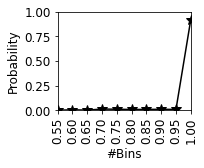

In [144]:
plt.rcParams.update({'font.size':12})
fig, ax = plt.subplots(figsize =(3, 2.5))
plt.rcParams["figure.autolayout"] = True

#a = [0.005586156724173769,0.014303159426314695,0.01895395967574309,0.019148825607981708,0.9291857202244855] #previous
#b = [0.5-0.6,0.6-0.7,0.7-0.8,0.8-0.9,0.9-1.0]
#b = [0.6,0.7,0.8,0.9,1.0] #previous

#a = [0.00037674080232799834,0.00520941592184577,0.0015589274579089587,0.012744231968405738,0.01061369777593016,0.008340261899812929,0.008989815007274995,0.010159010600706713,0.009054770318021202,0.9201309499064644]
a = [0.00037674080232799834, 0.00520941592184577, 0.0015589274579089587,0.012744231968405738,0.01061369777593016,
0.008340261899812929, 0.008989815007274995, 0.010159010600706713, 0.009054770318021202, 0.9201309499064644]
b = [0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0]
#bins = 10
#sns.histplot(value_cnt, bins=10)
#mylist = [key for key, val in histplot.items() for _ in range(val)]
plt.plot(b,a,marker='*', color='black', ms=10 )#, color = 'k')#, facecolor='k')
#plt.xticks(rotation=45)
#plt.barh(b,a)
plt.xlim(0.55,1.0)
plt.ylim(0.0,1.0)
plt.xticks(np.arange(0.55,1.05,0.05))
plt.setp(ax.get_xticklabels(), rotation=90, fontsize='medium')
#df['data'].plot(kind='bar', color='red')
#df['data'].plot(kind='line', marker='*', color='black', ms=10)

#plt.show()
#ax.figure.autofmt_xdate()
plt.xlabel("#Bins")
plt.ylabel("Probability")
#plt.title("Histogram with Probability Plot")
plt.savefig("D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/PredictedProbability_Others_14012023.pdf", dpi = 1200)
#plt.show()

NameError: name 'comb_mat' is not defined

<Figure size 432x288 with 0 Axes>

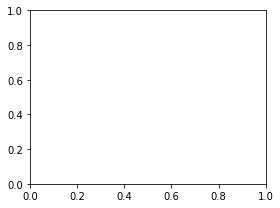

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import zscore
from scipy import stats



plt.rcParams.update({'font.size':12})
plt.rcParams["figure.figsize"] = [4, 3]
plt.rcParams["figure.autolayout"] = True

plt.clf()
fig, ax = plt.subplots(figsize=(4, 3))
#ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
arr = np.array([['1384','17','44','39'],['13','1004','175','261'],['36','111','9858','827'],['17','178','497','10942']])

ax = sns.heatmap(comb_mat, linewidths=0.5, annot=arr, fmt="", square = True, cmap = 'Blues')
#for i in range(confusion_matrix.shape[0]):
    #for j in range(confusion_matrix.shape[1]):
        #ax.text(x=j, y=i, s=confusion_matrix[i, j], va='center_baseline', ha='left', size='large')
#sns.heatmap(confusion_matrix, linewidths=0.5, annot=True, square = True, cmap = 'Blues')

        
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Accuracy Score: {0:.2f}'.format(clf.score(X_test, Y_test))
plt.title(all_sample_title, size = 10)

#labels = ['IoTCam', 'VShare', 'VConf']
ax.set_xticklabels(['IoTCam', 'Share', 'Conf', 'Other']); 
ax.set_yticklabels(['IoTCam', 'Share', 'Conf', 'Other']);

#plt.savefig("D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/PredictedAcc_confmatrix.pdf", dpi = 1200)